## Bachelor Thesis - Informatik

### Variante 2 :
### Multiclass-Klassifizierung von Greyscale-Bildern mit Convolutional Neuronal Network

<div align="left">
<h2><img src="https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExZ2hrOGtveWx0ZGxsaGFsYXNzbjVhOTNyaTg2cG44anZ5eWd5a3ZyMyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/l3vRcrVqhBVSpJte0/giphy.gif" width="200" alt="Data"></h2>
</div>

Dieser Ansatz verwendet als Datengrundlage die folgenden drei Datensätze :

#### ☑️ Ein eigener Datensatz der aus selbst aufgezeichneten Gesten eines Myo-Armbands besteht

#### ☑️ Ein Datensatz der bei Kaggle zur Verfügung steht

#### ☑️ Ein Datensatz der aus dem Ninapro DB5 Datensatz abgeleitet wurde

##### ▶️ Installation notwendiger Python-Bibliotheken

In [297]:
#%pip install pandas
#%pip install numpy
#%pip install seaborn
#%pip install -U seaborn-image
#%pip install matplotlib.pyplot
#%pip install scikit-learn

##### ▶️ Importieren notwendiger Python-Bibliotheken

In [2]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore

from sklearn.preprocessing import MinMaxScaler # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.metrics import classification_report, confusion_matrix # type: ignore

import tensorflow as tf # type: ignore

from tensorflow import keras # type: ignore
from keras import layers # type: ignore
from keras import ops # type: ignore

##### ▶️ Alternative 1 : Einlesen der eigenen Roh-Daten aus dem Quellordner<br>
****
📌 Dieses Feld ausführen bei Verwendung der Eigen-Daten !!

In [299]:
# Importiere die .csv-Dateien mit den EMG-Daten der einzelnen Probanden und den einzelnen Labels (Gesten)
# Dabei gilt folgendes Schema, siehe auch Bilder im Ordner "Gestenbilder"
# Label 0 --> Ruheposition
# Label 1 --> Daumen hoch
# Label 2 --> Zeige- und Mittelfinger gestreckt
# Label 3 --> Daumen, Zeige- und Mittelfinger gestreckt
# Label 4 --> Daumen gekrümmt in Richtung kleiner Finger
# Label 5 --> Alle Finger ausgestreckt
# Label 6 --> Finger zur Faust geballt


##############################################################
# Aufnahme der Einzelgesten                                  #
# Datentyp: Python List                                      #
##############################################################
single_data = []


##############################################################
# Baue daraus den Dateipfad und lese Datei ein               #
# Schreibe Nummer der Geste in entsprechende Spalte          #
##############################################################
for label in ['0', '1', '2', '3', '4']:
    single_data.append(pd.read_csv('./Eigene/P0L' + label + '.csv', sep=',', header=None))    
    single_data[int(label)][8] = int(label)


##############################################################
# Schreibe alle Sub-Dataframes in ein gesamtes Dataframe     #
# Datentyp: Pandas Dataframe                                 #
##############################################################
all_data = pd.concat([df for df in single_data], axis=0).reset_index(drop=True)

##### ▶️ Alternative 2 : Einlesen des Datensatzes von Kaggle aus dem Quellordner

****
📌 Dieses Feld ausführen bei Verwendung der Kaggle-Daten !!

[Link zum Datensatz](https://www.kaggle.com/code/akshita72/hand-gesture-recognition-from-emg-signals/input)

In [16]:
# Importiere die .csv-Dateien mit den EMG-Daten der einzelnen Probanden und den einzelnen Labels (Gesten)
# Dabei gilt folgendes Schema:
# Label 0 --> Stein
# Label 1 --> Schere
# Label 2 --> Papier
# Label 3 --> OK-Zeichen


##############################################################
# Aufnahme der Einzelgesten                                  #
# Datentyp: Python List                                      #
##############################################################
single_data = []


##############################################################
# Baue daraus den Dateipfad und lese Datei ein               #
# Schreibe Nummer der Geste in entsprechende Spalte          #
##############################################################
for label in ['0', '1', '2', '3', ]:
    single_data.append(pd.read_csv('./Kaggle/' + label + '.csv', sep=',', header=None))    
    

##############################################################
# Schreibe alle Sub-Dataframes in ein gesamtes Dataframe     #
# Datentyp: Pandas Dataframe                                 #
##############################################################
all_data = pd.concat([df for df in single_data], axis=0).reset_index(drop=True)

##### ▶️ Alternative 3 : Einlesen von Daten aus dem Ninapro DB5 Datensatz<br>
****
📌 Dieses Feld ausführen bei Verwendung Ninapro-Daten !!

[Link zum Datensatz](https://ninapro.hevs.ch/instructions/DB5.html)

In [44]:
# Die Dateien im Ordner "Ninapro_DB5" enthalten Auszüge aus dem originalen Datensatz
# Aus den Matlab-Files wurden die 8 Sensorwerte und die zugehörigen Labels entnommen
# Es wurden nur die "Subjects" 01 bis 06 berücksichtigt

# Importiere die .csv-Dateien mit den EMG-Daten der einzelnen Probanden und den einzelnen Labels (Gesten)
# Dabei gilt folgendes Schema, siehe auch Bilder im Ordner "Gestenbilder"
# Label 0 --> Ruheposition
# Label 1 --> Daumen hoch
# Label 2 --> Zeige- und Mittelfinger gestreckt
# Label 3 --> Daumen, Zeige- und Mittelfinger gestreckt
# Label 4 --> Daumen gekrümmt in Richtung kleiner Finger
# Label 5 --> Alle Finger ausgestreckt
# Label 6 --> Finger zur Faust geballt

##############################################################
# Aufnahme der Einzelgesten                                  #
# Datentyp: Python List                                      #
##############################################################
single_data = []


##############################################################
# Baue daraus den Dateipfad und lese Datei ein               #
# Schreibe Nummer der Geste in entsprechende Spalte          #
##############################################################
for label in ['1', '2', '3', '4', '5', '6']:
    single_data.append(pd.read_csv('./Ninapro_DB5/P' + label + '.csv', sep=';', header=None))    
    

##############################################################
# Schreibe alle Sub-Dataframes in ein gesamtes Dataframe     #
# Datentyp: Pandas Dataframe                                 #
##############################################################
all_data = pd.concat([df for df in single_data], axis=0).reset_index(drop=True)

all_data.tail()

,0,1,2,3,4,5,6,7,8
567995,-1,1,-2,-1,-1,0,0,3,0
567996,-2,2,-2,-3,-1,-3,-3,-2,0
567997,-3,-5,-3,-1,0,0,-2,3,0
567998,-5,0,0,-2,-1,-1,0,-3,0
567999,-1,-5,0,-1,0,0,0,-1,0


##### ▶️ Ansatz 1 : Umwandlung in Greyscale-Bilder mit allen Sensorkanälen pro Bild
****

📌 Dieses Feld für Bilder mit allen Sensorwerten pro Bild ausführen --> **unbedingt die richtige Label-Struktur einkommentieren !!**

****
☑️ Erzeugte Strukturen aus den Eigen-Daten haben das Format 16 x 8<br>
☑️ Erzeugte Strukturen aus den Kaggle-Daten haben das Format 16 x 64<br>
****
<br>
📌 Jede Struktur enthält alle 8 Sensorkanäle

In [46]:
def split_dataframe(df, n, reminder = None):
    # Get number of rows in DataFrame
    total_rows = len(df)
    
    # Initialize list to hold the split DataFrames
    dfs = []
    
    # Calculate the number of DataFrames
    num_dfs = total_rows // n
    extra_rows = total_rows % n
    
    if reminder == 'first' and extra_rows > 0:
        # Size of first chunk is equal to reminder. Remaining chunks are same size.
        dfs.append(df.iloc[:n + extra_rows])
        start_idx = n + extra_rows
        for _ in range(1, num_dfs):
            dfs.append(df.iloc[start_idx:start_idx + n])
            start_idx += n
    elif reminder == 'last' and extra_rows > 0:
        # Last chunk consists of remining rows. The other chunks are the same size.
        for i in range(num_dfs):
            dfs.append(df.iloc[i*n:(i+1)*n])
        # Add extra rows to the last chunk
        dfs.append(df.iloc[num_dfs*n:])
    elif reminder == 'spread':
        # Evenly spread extra rows across the first few chunks
        for i in range(num_dfs + (1 if extra_rows > 0 else 0)):
            size = n + (1 if i < extra_rows else 0)
            dfs.append(df.iloc[i*size:min((i+1)*size, total_rows)])
    else:
        if extra_rows > 0:
            raise ValueError(f"DataFrame Länge ist nicht teilbar durch {n}. Bitte nutze den 'reminder' Parameter.")
        # If remainder is None and the DataFrame is perfectly divisible
        for i in range(num_dfs):
            dfs.append(df.iloc[i*n:(i+1)*n])
    
    return dfs


##############################################################
# Einzelwerte der Labels auslesen                            #
# Datentyp Pandas Dataframe                                  #
##############################################################
labels = all_data[all_data.columns[-1]]
 

##############################################################
# Klassen aus den Labels auslesen                            #
# Datentyp Numpy Array                                       #
##############################################################
classes = np.unique(labels)
print("Classes Shape:",classes.shape)


##############################################################
# Sensorwerte der Gesten auslesen                            #
# Datentyp Pandas Dataframe                                  #
##############################################################
sensors = all_data.drop(8, axis=1).copy()
#sensors = all_data.drop(64, axis=1).copy()

##############################################################
# Zerteile Gesamtdaten in Einzelpakete mit jeweils 16 Zeilen #
# Datentyp Python List                                       #
##############################################################
images = split_dataframe(sensors, 16, 'last')
labels = split_dataframe(labels, 16, 'last')


##############################################################
# Entferne letztes Tupel aus Listen                          #
# Bei ungerader Anzahl Tupeln hat das letzte Listenelement   #
# eine abweichende Anzahl an Datenpunkten --> Problem        #
# Datentyp Python List                                       #
##############################################################
l_images = len(images)-1
images = images[:l_images]

l_labels = len(labels)-1
labels = labels[:l_labels]


##############################################################
# Konvertiere die Listen in Numpy-Arrays                     #
# Datentyp Numpy-Array                                       #
##############################################################
images = np.array(images)
labels = np.array(labels)


#############################################################
# Reduziere die Dimension der Labels auf 1                   #
# Wichtig für das Convolution Neuronal Network !!            #
##############################################################
labels = labels[:,1]


##############################################################
# Gebe die Form des Image-Vectors aus                        #
##############################################################
print("Images Shape: ", images.shape)


##############################################################
# Gebe die Form des Label-Vectors aus                        #
##############################################################
print("Labels Shape:", labels.shape)


Classes Shape: (7,)
Images Shape:  (35499, 16, 8)
Labels Shape: (35499,)


##### ▶️ Ansatz 2 : Umwandlung in Greyscale-Bilder mit einem Sensorkanal pro Bild
****

📌 Dieses Feld für Bilder mit einem Sensorwert pro Bild ausführen<br>
📌 Dieser Ansatz benötigt Daten wie im Kaggle-Datensatz, also [8] x [8] Sensorwerte pro Zeile

****
☑️ Erzeugte Strukturen aus den Kaggle-Daten haben das Format 16 x 64<br>
****
<br>
📌 Jede Struktur enthält nur 1 Sensorkanal

In [45]:
def split_dataframe(df, n, reminder = None):
    # Get number of rows in DataFrame
    total_rows = len(df)
    
    # Initialize list to hold the split DataFrames
    dfs = []
    
    # Calculate the number of DataFrames
    num_dfs = total_rows // n
    extra_rows = total_rows % n
    
    if reminder == 'first' and extra_rows > 0:
        # Size of first chunk is equal to reminder. Remaining chunks are same size.
        dfs.append(df.iloc[:n + extra_rows])
        start_idx = n + extra_rows
        for _ in range(1, num_dfs):
            dfs.append(df.iloc[start_idx:start_idx + n])
            start_idx += n
    elif reminder == 'last' and extra_rows > 0:
        # Last chunk consists of remining rows. The other chunks are the same size.
        for i in range(num_dfs):
            dfs.append(df.iloc[i*n:(i+1)*n])
        # Add extra rows to the last chunk
        dfs.append(df.iloc[num_dfs*n:])
    elif reminder == 'spread':
        # Evenly spread extra rows across the first few chunks
        for i in range(num_dfs + (1 if extra_rows > 0 else 0)):
            size = n + (1 if i < extra_rows else 0)
            dfs.append(df.iloc[i*size:min((i+1)*size, total_rows)])
    else:
        if extra_rows > 0:
            raise ValueError(f"DataFrame Länge ist nicht teilbar durch {n}. Bitte nutze den 'reminder' Parameter.")
        # If remainder is None and the DataFrame is perfectly divisible
        for i in range(num_dfs):
            dfs.append(df.iloc[i*n:(i+1)*n])
    
    return dfs

##############################################################
# Einzelwerte der Labels auslesen                            #
# Datentyp Pandas Dataframe                                  #
##############################################################
labels = all_data[all_data.columns[-1]]


##############################################################
# Klassen aus den Labels auslesen                            #
# Datentyp Numpy Array                                       #
##############################################################
classes = np.unique(labels)
print("Classes Shape:",classes.shape)


##############################################################
# Zerlege Labels in Einzelpakete mit jeweils 1024 Zeilen     #
# Datentyp Python List                                       #
##############################################################
labels = split_dataframe(labels, 1024, 'last')


##############################################################
# Entferne letztes Tupel aus Listen                          #
# Bei ungerader Anzahl Tupeln hat das letzte Listenelement   #
# eine abweichende Anzahl an Datenpunkten --> Problem        #
# Datentyp Python List                                       #
##############################################################
l_labels = len(labels)-1
labels = labels[:l_labels]


##############################################################
# Array-Elemente in Format 704x16 konvertieren               #
# Datentyp Numpy Array                                       #
##############################################################  
labels = np.array(labels)
labels = labels.reshape(704, -1)


##############################################################
# Reduziere die Dimension der Labels auf 1                   #
# Wichtig für das Convolution Neuronal Network !!            #
##############################################################
labels = labels[:,1]


##############################################################
# Zerlege Sensorwert in Einzelpakete mit jeweils 1024 Zeilen #
# Datentyp Python List                                       #
##############################################################
sensors = all_data.drop(64, axis=1).copy()
split = split_dataframe(sensors, 1024, 'last')


##############################################################
# Entferne letztes Tupel aus Listen                          #
# Bei ungerader Anzahl Tupeln hat das letzte Listenelement   #
# eine abweichende Anzahl an Datenpunkten --> Problem        #
# Datentyp Python List                                       #
##############################################################
l_split = len(split)-1
split = split[:l_split]


##############################################################
# Reduziere die 3D-Array auf 2D-Array                        #
# Wichtig für das Convolution Neuronal Network !!            #
# Datentyp Numpy Array                                       #
##############################################################
split = np.array(split)
split = split.reshape(-1, split.shape[-1])


##############################################################
# Lese die Spalten aus den Sensorwerten in neue Liste ein    #
# Dies ist jeder Sensorkanal einzeln                         #
# Datentyp Pandas Dataframe --> split --> wegen columns      #
# Datentyp Liste --> single_sensors --> wegen append()       #
##############################################################
single_sensors = []
split = pd.DataFrame(split)

for i in range(len(split.columns)):
   single_sensors.append(split_dataframe(split[i], 16, 'last'))


##############################################################
# Array-Elemente in Format 16x64 konvertieren                #
# Datentyp Numpy Array                                       #
##############################################################  
single_sensors = np.array(single_sensors)
single_sensors = single_sensors.reshape(-1,16,64)
images = single_sensors


##############################################################
# Gebe die Form des Image-Vectors aus                        #
##############################################################
print("Images Shape: ", images.shape)


##############################################################
# Gebe die Form des Label-Vectors aus                        #
##############################################################
print("Labels Shape:", labels.shape)

Classes Shape: (7,)


ValueError: cannot reshape array of size 567296 into shape (704,newaxis)

#### ▶️ Normalisierung der Daten

In [47]:

##############################################################
# Datenskalierung mit Min-/Max Prinzip                       #
# Skalierung auf Werte von 0 bis 255 als Pixel               #
##############################################################  
sc = MinMaxScaler(feature_range=(0,255))


##############################################################
# Umwandlung aller Daten ins Pixelformat                     #
# Datentyp Numpy Array                                       #
##############################################################  
for i, df in enumerate(images):
    images[i] = sc.fit_transform(images[i])


#### ▶️ Darstellung der erzeugten Grayscale-Bilder

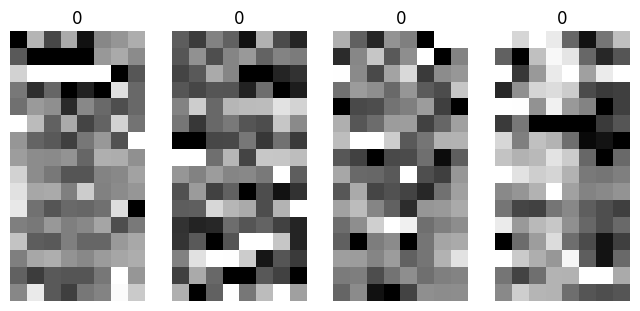

In [48]:

fig = plt.figure(figsize=(8, 4)) # type: ignore

for i in range(4):
    ax = plt.subplot(1, 4, i + 1)
    plt.imshow(images[i],cmap='gray', vmin=0, vmax=255)    
    plt.title(labels[i])
    plt.axis("off")
    

### ▶️ Datensatz aufteilen in Training- und Test-Daten

In [50]:
##############################################################
# Einkommentieren für eigene Daten                           #
# Klassen entsprechen der vorhandenen Gesten                 #
##############################################################
#num_classes = 5


##############################################################
# Einkommentieren für den Kaggle-Datensatz                   #
# Fixwert 4                                                  #
##############################################################
#num_classes = 4


##############################################################
# Einkommentieren für den Ninapro-Datensatz                  #
# Fixwert 7                                                 #
##############################################################
num_classes = 7


##############################################################
# Einkommentieren für eigene Daten und Ninapro               #
# Bei 8 Sensorwerten  pro Zeile --> (16, 8, 1)               #
# Bei 64 Sensorwerten pro Zeile --> (16, 64, 1)              #
##############################################################
input_shape = (16, 8, 1)


##############################################################
# Einkommentieren für den Kaggle-Datensatz                   #
# Fix 64 Sensorwerte pro Zeile --> (16, 64, 1)               #
##############################################################
#input_shape = (16, 64, 1)


##############################################################
# Aufteilung der Datensätze in Training- und Testdaten       #
# Test-Size --> prozentualer Anteil von Gesamtdaten          #
# Random-State --> Zufallsgrad der Durchmischung             #
##############################################################
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 40) # type: ignore


##############################################################
# Konvertieren auf Wertebereich 0.0 bis 1.0                  #
##############################################################
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255


##############################################################
# Vierte Dimension für Algorithmus hinzufügen                #
##############################################################
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)


##############################################################
# Status der Datensätze ausgeben                             #
##############################################################
print("X_train Vectorform:", X_train.shape)
print("X_test Vectorform:", X_test.shape)
print("y_train Vectorform:", y_train.shape)
print("y_test Vectorform:", y_test.shape)
print()
print(images.shape[0], "Gesamtwerte")
print(X_train.shape[0], "Trainingswerte")
print(X_test.shape[0], "Testwerte")


##############################################################
# Klassenvektor in Matrize konvertieren (One-Hot-Encoding)   #
##############################################################
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train Vectorform: (24849, 16, 8, 1)
X_test Vectorform: (10650, 16, 8, 1)
y_train Vectorform: (24849,)
y_test Vectorform: (10650,)

35499 Gesamtwerte
24849 Trainingswerte
10650 Testwerte


#### ▶️ S-ConvNet Modell A aus der folgenden Publikation :<br>

##### "S-Convnet: A Shallow Convolutional Neural Network Architecture for Neuromuscular Activity Recognition Using Instantaneous High-Density Surface EMG Images"<br>

[Link]https://ieeexplore.ieee.org/document/9175266)

📌 Die zugehörige Architektur ist dort zu finden in Tabelle 1

In [64]:
##############################################################
# Hyperparameter                                             #
##############################################################
batch_size = 512
epochs = 50

initializer='glorot_uniform'
#initializer='glorot_normal'
#initializer='he_uniform'
#initializer='he_normal'
#initializer='lecun_uniform'
#initializer='lecun_normal'
#initializer='ones'
#initializer='zeros'

#padding='valid'
padding='same'



##############################################################
# Modell A aus Table 1                                       #
##############################################################
model = keras.Sequential()
model.add(layers.InputLayer(input_shape))

model.add(layers.Conv2D(32, (3 ,3), padding = padding, input_shape=input_shape, kernel_initializer=initializer))
model.add(layers.Activation('elu'))

model.add(layers.Conv2D(64, (2, 2), padding = 'same' ))
model.add(layers.Activation('elu'))

model.add(layers.Conv2D(64, (2, 2), padding = 'same' ))
model.add(layers.Activation('elu'))

model.add(layers.Flatten())

model.add(layers.Dense(256))
model.add(layers.Activation('elu'))

model.add(layers.Dense(num_classes, activation = 'softmax'))

# Modellparameter ausgeben
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_57 (Conv2D)              │ (None, 16, 8, 32)      │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_49 (Activation)      │ (None, 16, 8, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 16, 8, 64)      │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_50 (Activation)      │ (None, 16, 8, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 16, 8, 64)      │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_51 (Activation)      │ (None, 16, 8, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_52 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,124,231 (8.10 MB)

 Trainable params: 2,124,231 (8.10 MB)

 Non-trainable params: 0 (0.00 B)

Modell B

In [71]:
##############################################################
# Hyperparameter                                             #
##############################################################
batch_size = 64
epochs = 70

#initializer='glorot_uniform'
#initializer='glorot_normal'
initializer='he_uniform'
#initializer='he_normal'
#initializer='lecun_uniform'
#initializer='lecun_normal'
#initializer='ones'
#initializer='zeros'

#padding='valid'
padding='same'

##############################################################
# Modell B aus Table 1                                       #
##############################################################
model = keras.Sequential()
model.add(layers.InputLayer(input_shape))

model.add(layers.Conv2D(128, (3,3), padding = padding, input_shape=input_shape, kernel_initializer=initializer))
model.add(layers.Activation('elu'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(64, (1,1), padding = padding, strides=2))
model.add(layers.Activation('elu'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(256))
model.add(layers.Activation('elu'))

model.add(layers.Dense(num_classes, activation = 'softmax'))

# Modellparameter ausgeben
model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_70 (Conv2D)              │ (None, 16, 8, 128)     │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_66 (Activation)      │ (None, 16, 8, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 16, 8, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 8, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 4, 2, 64)       │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_67 (Activation)      │ (None, 4, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 4, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 2, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_24 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_68 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,359 (173.28 KB)

 Trainable params: 44,359 (173.28 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
# Modell kompilieren
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

# Parameter und Daten an Modell übergeben
# Training durchführen
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,    
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/70
311/311 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5328 - loss: 1.5855 - val_accuracy: 0.5527 - val_loss: 1.4897 - learning_rate: 0.0010
Epoch 2/70
311/311 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5426 - loss: 1.4767 - val_accuracy: 0.5256 - val_loss: 1.5597 - learning_rate: 0.0010
Epoch 3/70
311/311 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5471 - loss: 1.4529 - val_accuracy: 0.5539 - val_loss: 1.4327 - learning_rate: 0.0010
Epoch 4/70
311/311 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5495 - loss: 1.4402 - val_accuracy: 0.5193 - val_loss: 1.5392 - learning_rate: 0.0010
Epoch 5/70
311/311 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5474 - loss: 1.4411 - val_accuracy: 0.5074 - val_loss: 1.5380 - learning_rate: 0.0010
Epoch 6/70
311/311 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5438 - loss: 1.4397 - val_accuracy: 0.5157 - val_loss: 1.5055 - learning_rate: 0.0010
Epoch 7/70
311/311 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5484 - loss: 1.43

KeyboardInterrupt: 

### ▶️ Ausgabe der Funktionen für Verlust und Genauigkeit

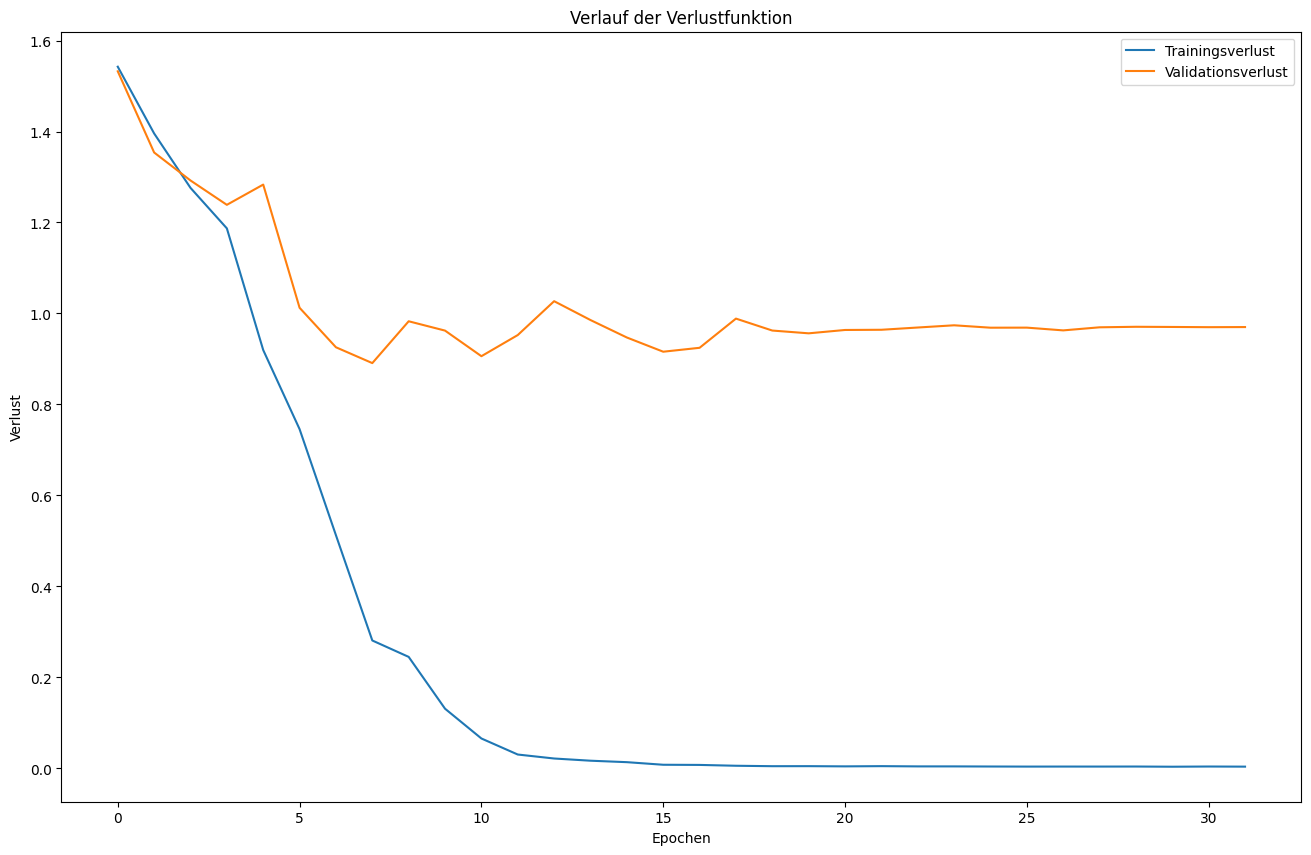

In [26]:
plt.figure(figsize=(16, 10))

plt.plot(range(epochs), history.history['loss'], label="Trainingsverlust")
plt.plot(range(epochs), history.history['val_loss'], label="Validationsverlust")

plt.xlabel("Epochen")
plt.ylabel("Verlust")
plt.legend()
plt.title("Verlauf der Verlustfunktion")

plt.show()

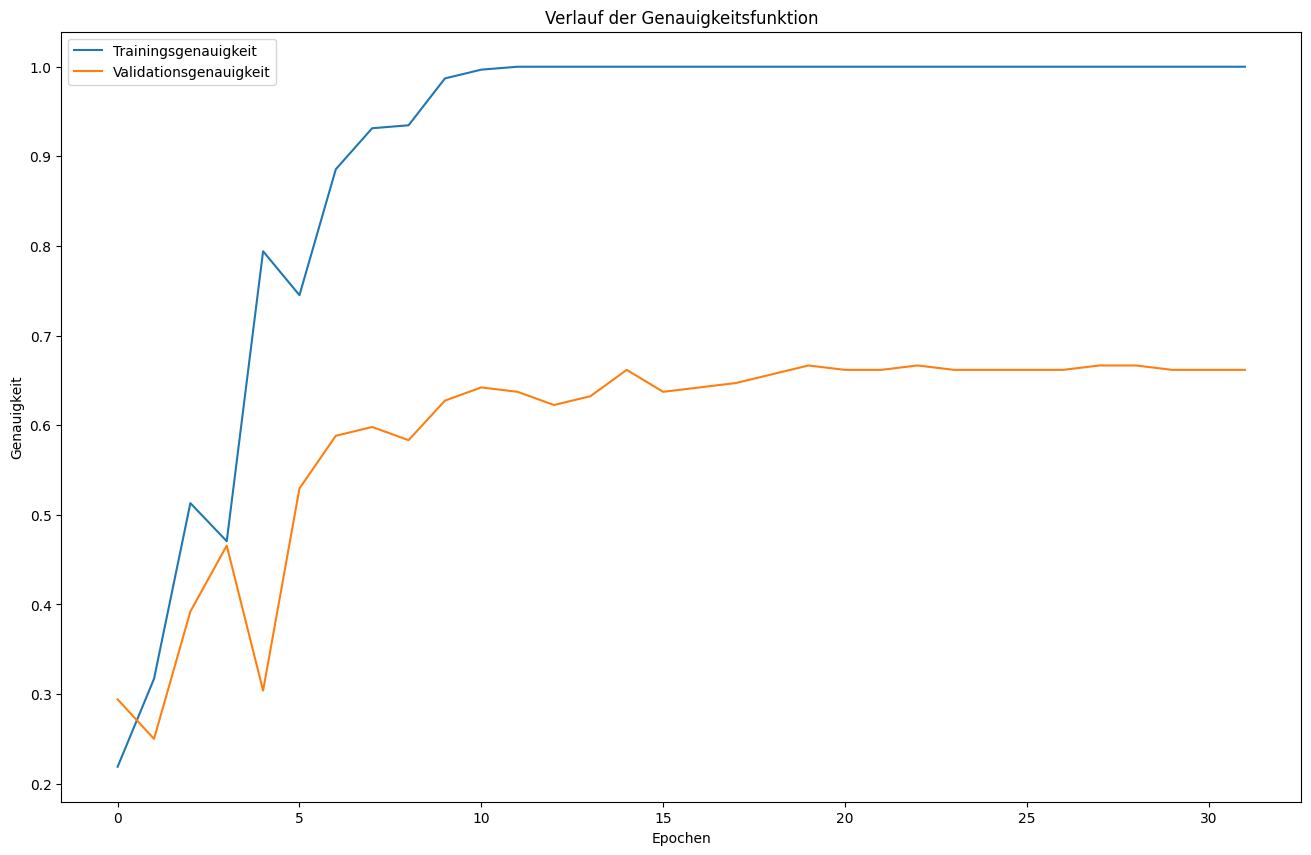

In [27]:
plt.figure(figsize=(16, 10))

plt.plot(range(epochs), history.history['accuracy'], label="Trainingsgenauigkeit")
plt.plot(range(epochs), history.history['val_accuracy'], label="Validationsgenauigkeit")

plt.xlabel("Epochen")
plt.ylabel("Genauigkeit")
plt.legend()
plt.title("Verlauf der Genauigkeitsfunktion")

plt.show()

### ▶️ Scores zur Beurteilung der Modellqualität 

In [114]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Testverlust :", score[0])
print("Testgenauigkeit :", score[1])

Testverlust : 1.1286870241165161
Testgenauigkeit : 0.5388127565383911


### ▶️ Metriken zur Beurteilung der Modellqualität 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


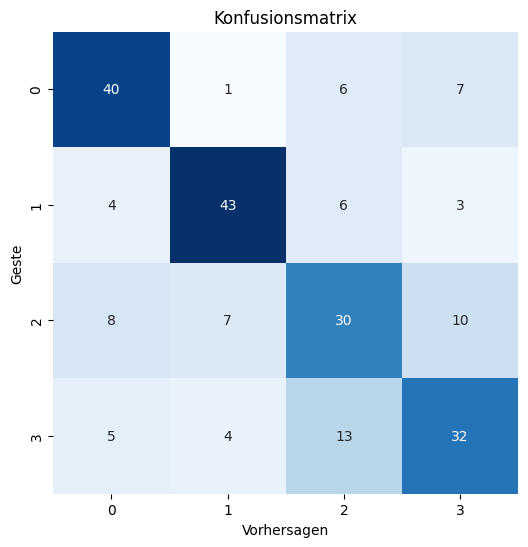

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        54
           1       0.78      0.77      0.77        56
           2       0.55      0.55      0.55        55
           3       0.62      0.59      0.60        54

    accuracy                           0.66       219
   macro avg       0.66      0.66      0.66       219
weighted avg       0.66      0.66      0.66       219



In [28]:
y_test_arg=np.argmax(y_test,axis=1)
y_pred = np.argmax(model.predict(X_test),axis=1)
# 
cm = confusion_matrix(y_test_arg, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Vorhersagen")
plt.ylabel("Geste")
plt.title("Konfusionsmatrix")
plt.show()

print(classification_report(y_test_arg, y_pred))